### Linear Regression
Lets generate simple linear data.

$$ y = 3x + 4 + noise

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# lets make it reproducable
np.random.seed(0)

# Generating  random value of x between 0 and 10
X = np.random.rand(100, 1)*10

# Generating y = 3x + 4 + noise
y = 3 * X + 4 + np.random.randn(100, 1)

# Converting to DataFrame

df = pd.DataFrame({"X": X.flatten(), "y": y.flatten()})
print(df)





           X          y
0   5.488135  19.299255
1   7.151894  26.356507
2   6.027634  22.548564
3   5.448832  18.810252
4   4.236548  18.197896
..       ...        ...
95  1.831914  10.177335
96  5.865129  20.791978
97  0.201075   3.913677
98  8.289400  28.412668
99  0.046955   4.158343

[100 rows x 2 columns]


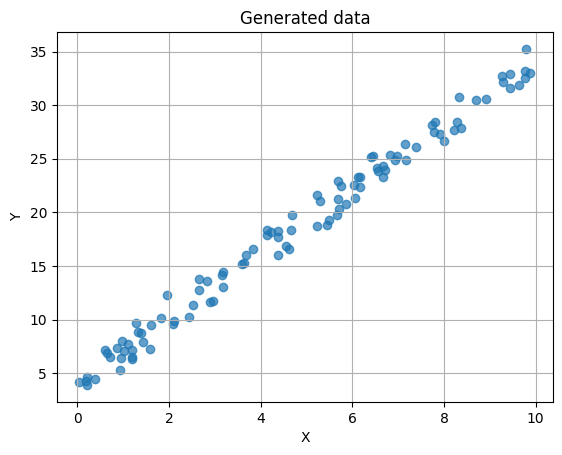

In [3]:
# Visualising the data
plt.scatter(df["X"], df["y"], alpha=0.7) # alpha: controls transprancy of markers
plt.title("Generated data")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

In [4]:
# Training the model

# separating features and labels
X_np = df["X"].values.reshape(-1,1)
y_np = df["y"].values.reshape(-1,1)

# Adding a column of 1s in X for bias terms
X_b = np.hstack([X_np, np.ones((X_np.shape[0], 1))])

# Appling the normal equation
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_np

# Extracting weights
w, b = theta[0][0], theta[1][0]

print("Weight(w): ", w )
print("bias(b): ", b )

Weight(w):  2.9936935021402045
bias(b):  4.222151077447224


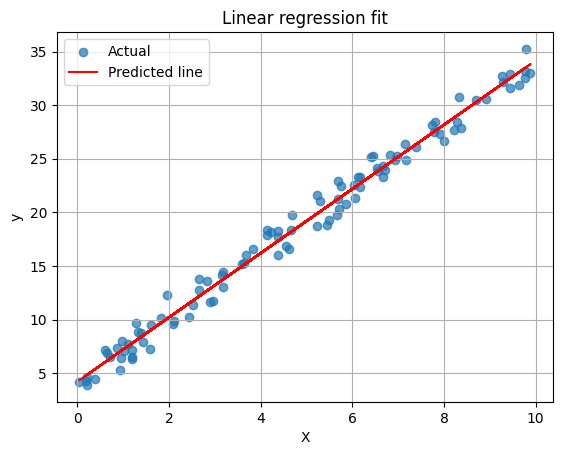

In [5]:
# The prediction line
y_pred = w * X_np + b

# Ploting original data
plt.scatter(X_np, y_np, label="Actual", alpha=0.7)

# Ploting the predicted line
plt.plot(X_np, y_pred, color="red", label="Predicted line")

plt.title("Linear regression fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# Root Mean Square Error (RMSE-original unit)

rmse = np.sqrt(np.mean((y_np-y_pred)**2))
print("RMSE: ", rmse)

RMSE:  0.9962121504602564


In [7]:
# Comparision with sklearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_np, y_np)

y_sklearn_pred = model.predict(X_np)

w_sklearn = model.coef_[0]
b_sklearn = model.intercept_

print("Weight from sklearn: ", w_sklearn)
print("bias from sklearn: ", b_sklearn)

Weight from sklearn:  [2.9936935]
bias from sklearn:  [4.22215108]


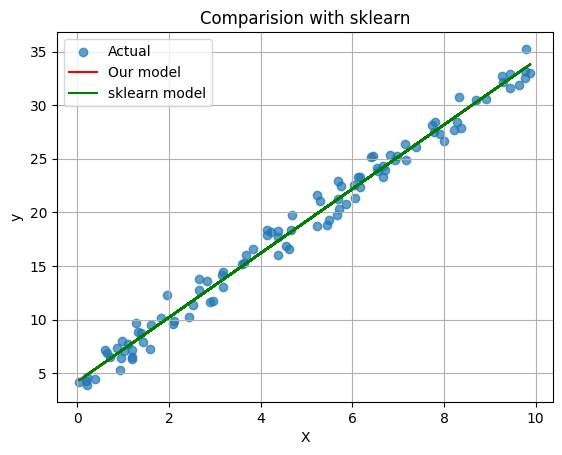

RMSE of our model:  0.9962121504602564
RMSE of sklearn model:  0.9962121504602561


In [9]:
# Ploting both the lines

plt.scatter(X_np, y_np, label="Actual", alpha=0.7)

# Our model
plt.plot(X_np, y_pred, color="red", label="Our model")
# Sklearn model
plt.plot(X_np, y_sklearn_pred, color="green", label="sklearn model")

plt.title("Comparision with sklearn")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# RMSE comparision
rmse_our = np.sqrt(np.mean((y_np-y_pred)**2))
rmse_sklearn = np.sqrt(np.mean((y_np-y_sklearn_pred)**2))

print("RMSE of our model: ", rmse_our)
print("RMSE of sklearn model: ", rmse_sklearn)
